# Let's get some statistics from the night_Canada set

In [5]:
country = "Canada" # change this later

dataset_path = f"../../yolo-testing/datasets/night_only_{country}"
train_images_path = f"{dataset_path}/train/Images"
val_images_path = f"{dataset_path}/val/Images"
test_images_path = f"{dataset_path}/test/Images"

bg_train_images_path = f"{dataset_path}/background/train"
bg_val_images_path = f"{dataset_path}/background/val"
bg_test_images_path = f"{dataset_path}/background/test"

In [39]:
import glob

train_images_list = glob.glob(f"{train_images_path}/*.jpg")
train_images_list_len = len(train_images_list)

# Get lists of images
train_images_list = glob.glob(f"{train_images_path}/*.jpg")
val_images_list = glob.glob(f"{val_images_path}/*.jpg")
test_images_list = glob.glob(f"{test_images_path}/*.jpg")

# Get lists of background images
bg_train_images_list = glob.glob(f"{bg_train_images_path}/*.jpg")
bg_val_images_list = glob.glob(f"{bg_val_images_path}/*.jpg")
bg_test_images_list = glob.glob(f"{bg_test_images_path}/*.jpg")

# Get lengths
train_images_list_len = len(train_images_list)
val_images_list_len = len(val_images_list)
test_images_list_len = len(test_images_list)

bg_train_images_list_len = len(bg_train_images_list)
bg_val_images_list_len = len(bg_val_images_list)
bg_test_images_list_len = len(bg_test_images_list)


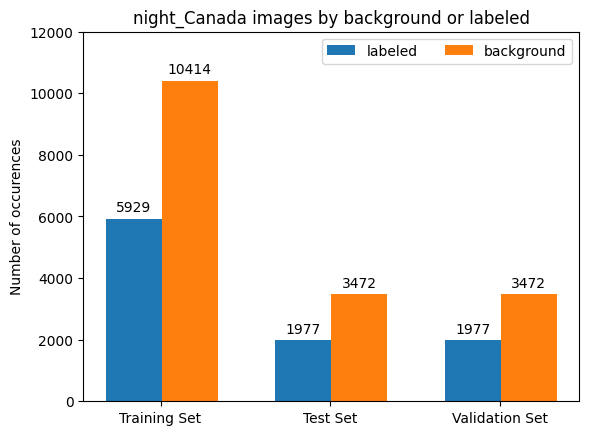

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ('Training Set', 'Test Set', 'Validation Set')
daytime_distribution = {
    "labeled": (train_images_list_len, test_images_list_len, val_images_list_len),
    "background": (bg_train_images_list_len, bg_test_images_list_len, bg_val_images_list_len)
}

# Bar width and positions
base_offset = 0.1715
bar_width = 0.33
x = np.arange(len(categories))
multiplier = 0

# Create stacked bar chart
fig, ax = plt.subplots()
for time, number in daytime_distribution.items():
    offset = bar_width * multiplier
    rects = ax.bar(base_offset + x + offset, number, bar_width, label=time)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Labels and title
ax.set_ylabel('Number of occurences')
ax.set_title(f'night_{country} images by background or labeled')
ax.set_xticks(x + bar_width, categories)
ax.legend(loc="upper right", ncols=2)
ax.set_ylim(0, 12000)


# Show plot
plt.show()

In [42]:
# label classes
with open (f"{dataset_path}/label_class.txt") as f:
    id2cls = dict()
    lines = f.readlines()
    for line in lines:
        cid, c = line.split(',')
        cid = int(cid)
        id2cls[cid] = c.strip()
print(id2cls)

{1: 'vehicle', 2: 'person', 3: 'bus', 4: 'minibus', 5: 'truck', 6: 'traffic_sign'}


## create labels folder in night_{country}

In [55]:
import os

labels_folder_path = f"{dataset_path}/labels"
os.makedirs(labels_folder_path, exist_ok=True)

train_labels_folder_path = labels_folder_path + "/train"
os.makedirs(train_labels_folder_path, exist_ok=True)

val_labels_folder_path = labels_folder_path + "/val"
os.makedirs(val_labels_folder_path, exist_ok=True)

test_labels_folder_path = labels_folder_path + "/test"
os.makedirs(test_labels_folder_path, exist_ok=True)


## Parse the json label files

images: [{
    file_name: string
    id: number
    width: number
    height: number
}],

annotations: list[{
    id: number
    image_id: number
    category_id: number
    segmentation: []
    area: number
    bbox: [num,num,num,num]
    iscrowd: number

}]

In [82]:
import json
from tqdm import tqdm

def coco_to_yolo(coco_bbox, img_width, img_height):
    x_min, y_min, width, height = coco_bbox
    # Convert to YOLO format (normalized)
    x_center = (x_min + (width / 2)) / img_width
    y_center = (y_min + (height / 2)) / img_height
    width = width / img_width
    height = height / img_height
    return (x_center, y_center, width, height)


def create_txt_labels(json_file, labels_folder, save=True):
    with open(json_file, 'r') as f:
        data = json.load(f)
    images = data["images"]
    print(f"{len(images)} images in total in {json_file}")
    annotations = data["annotations"]
    for image in tqdm(images):
        image_id = image["id"]
        name = image["file_name"]
        out_file = labels_folder + name[:-3] + "txt"
        img_width, img_height = image["width"], image["height"]
        matching_annotations = [a for a in annotations if a["image_id"] == image_id]

        img_annotations = list()
        for annotation in matching_annotations:
            x_c, y_c, w, h = coco_to_yolo(annotation["bbox"], img_width, img_height)
            cat_id = annotation["category_id"]
            img_annotations.append(f"{cat_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}")
            
        if (save):
            with open(out_file, "w") as f:
                f.writelines('\n'.join(img_annotations))

# obj training labels
create_txt_labels(f"{dataset_path}/train/train.json", f"{labels_folder_path}/train/")
create_txt_labels(f"{dataset_path}/val/val.json", f"{labels_folder_path}/val/")
create_txt_labels(f"{dataset_path}/test/test.json", f"{labels_folder_path}/test/")


5929 images in total in ../../yolo-testing/datasets/night_Canada/train/train.json


100%|██████████| 5929/5929 [00:03<00:00, 1785.09it/s]


1977 images in total in ../../yolo-testing/datasets/night_Canada/val/val.json


100%|██████████| 1977/1977 [00:00<00:00, 4498.41it/s]


1977 images in total in ../../yolo-testing/datasets/night_Canada/test/test.json


100%|██████████| 1977/1977 [00:00<00:00, 4102.99it/s]


# Create Images folder

In [84]:

images_folder_path = f"{dataset_path}/images"
os.makedirs(images_folder_path, exist_ok=True)

train_images_folder_path = images_folder_path + "/train"
os.makedirs(train_images_folder_path, exist_ok=True)

val_images_folder_path = images_folder_path + "/val"
os.makedirs(val_images_folder_path, exist_ok=True)

test_images_folder_path = images_folder_path + "/test"
os.makedirs(test_images_folder_path, exist_ok=True)

# Move object images to images folder

In [ ]:
import shutil
import glob

sources = [f"{dataset_path}/test/Images", f"{dataset_path}/train/Images", f"{dataset_path}/val/Images"]
destinations = [f"{dataset_path}/images/test", f"{dataset_path}/images/train", f"{dataset_path}/images/val"]

for source, dest in zip(sources, destinations):
    print(f"Moving from {source} to {dest}")
    files = glob.glob(f"{source}/*.jpg")
    print(f"{len(files)} files in total")
    for file in files:
        shutil.move(file, dest)
        # print(f"Moving {file} to {dest}")

Moving from ../../yolo-testing/datasets/night_Canada/test/Images to ../../yolo-testing/datasets/night_Canada/images/test
1977 files in total
Moving from ../../yolo-testing/datasets/night_Canada/train/Images to ../../yolo-testing/datasets/night_Canada/images/train
5929 files in total
Moving from ../../yolo-testing/datasets/night_Canada/val/Images to ../../yolo-testing/datasets/night_Canada/images/val
1977 files in total


# Sanity check

In [95]:
# Check that all images were moved from their original location
assert(len(os.listdir(sources[0])) == 0)
assert(len(os.listdir(sources[1])) == 0)
assert(len(os.listdir(sources[2])) == 0)

# Check that the number of images and labels are the same
len_train_images = len(glob.glob(f"{dataset_path}/images/train/*.jpg"))
len_val_images = len(glob.glob(f"{dataset_path}/images/val/*.jpg"))
len_test_images = len(glob.glob(f"{dataset_path}/images/test/*.jpg"))

len_train_labels = len(glob.glob(f"{dataset_path}/labels/train/*.txt"))
len_val_labels = len(glob.glob(f"{dataset_path}/labels/val/*.txt"))
len_test_labels = len(glob.glob(f"{dataset_path}/labels/test/*.txt"))

print(f"Images: train {len_train_images}, test {len_test_images}, val {len_val_images}")
print(f"Labels: train {len_train_labels}, test {len_test_labels}, val {len_val_labels}")


Images: train 5929, test 1977, val 1977
Labels: train 5929, test 1977, val 1977


# Background image processing

In [98]:
import random 

train_background_images = glob.glob(f"{dataset_path}/background/train/*.jpg")
test_background_images = glob.glob(f"{dataset_path}/background/test/*.jpg")
val_background_images = glob.glob(f"{dataset_path}/background/val/*.jpg")

print(f"Total background train images: {len(train_background_images)}")
print(f"Total background test images: {len(test_background_images)}")
print(f"Total background val images: {len(val_background_images)}")

selected_train_background_images = random.sample(train_background_images, len(train_background_images) // 2)
selected_test_background_images = random.sample(test_background_images, len(test_background_images) // 2)
selected_val_background_images = random.sample(val_background_images, len(val_background_images) // 2)

print(f"Total selected train bg images: {len(selected_train_background_images)}")
print(f"Total selected test bg images: {len(selected_test_background_images)}")
print(f"Total selected val bg images: {len(selected_val_background_images)}")

Total background train images: 10414
Total background test images: 3472
Total background val images: 3472
Total selected train bg images: 5207
Total selected test bg images: 1736
Total selected val bg images: 1736


In [113]:
from pathlib import Path

def process_bg_images(file_list, label_output_dir, image_output_dir):
    for filename in file_list:
        image_name = os.path.basename(filename)[:-4]
        label_file = f"{label_output_dir}/{image_name}.txt"

        # create empty label txt file
        if (not os.path.isfile(label_file)):
            Path(label_file).touch()

        # move image to output dir
        if (os.path.isfile(filename)):
            shutil.move(filename, image_output_dir)

process_bg_images(selected_train_background_images, f"{dataset_path}/labels/train", f"{dataset_path}/images/train")
process_bg_images(selected_test_background_images, f"{dataset_path}/labels/test", f"{dataset_path}/images/test")
process_bg_images(selected_val_background_images, f"{dataset_path}/labels/val", f"{dataset_path}/images/val")

In [114]:
# Check that the number of images and labels are the same
len_train_images = len(glob.glob(f"{dataset_path}/images/train/*.jpg"))
len_val_images = len(glob.glob(f"{dataset_path}/images/val/*.jpg"))
len_test_images = len(glob.glob(f"{dataset_path}/images/test/*.jpg"))

len_train_labels = len(glob.glob(f"{dataset_path}/labels/train/*.txt"))
len_val_labels = len(glob.glob(f"{dataset_path}/labels/val/*.txt"))
len_test_labels = len(glob.glob(f"{dataset_path}/labels/test/*.txt"))

print(f"Images: train {len_train_images}, test {len_test_images}, val {len_val_images}")
print(f"Labels: train {len_train_labels}, test {len_test_labels}, val {len_val_labels}")


Images: train 11136, test 3713, val 3713
Labels: train 11136, test 3713, val 3713


Total train labels: 11345
Total train images: 11345


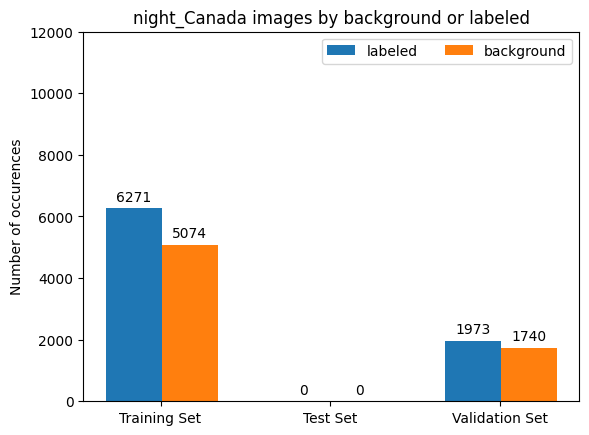

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

total_train_labels = len(glob.glob(f"{dataset_path}/images/train/*.txt"))
print(f"Total train labels: {total_train_labels}")
total_train_images = len(glob.glob(f"{dataset_path}/images/train/*.jpg"))
print(f"Total train images: {total_train_images}")

# Count number of background training images by way of empty label files
foreground_train_count = 0
background_train_count = 0
for label in glob.glob(f"{dataset_path}/images/train/*.txt"):
    if (os.path.getsize(label) == 0):
        background_train_count += 1
    else:
        foreground_train_count += 1

background_test_count = 0
foreground_test_count = 0
for label in glob.glob(f"{dataset_path}/labels/test/*.txt"):
    if (os.path.getsize(label) == 0):
        background_test_count += 1
    else:
        foreground_test_count += 1

background_val_count = 0
foreground_val_count = 0
for label in glob.glob(f"{dataset_path}/labels/val/*.txt"):
    if (os.path.getsize(label) == 0):
        background_val_count += 1
    else:
        foreground_val_count += 1

# Data
categories = ('Training Set', 'Test Set', 'Validation Set')
daytime_distribution = {
    "labeled": (foreground_train_count, foreground_test_count, foreground_val_count),
    "background": (background_train_count, background_test_count, background_val_count)
}

# Bar width and positions
base_offset = 0.1715
bar_width = 0.33
x = np.arange(len(categories))
multiplier = 0

# Create stacked bar chart
fig, ax = plt.subplots()
for time, number in daytime_distribution.items():
    offset = bar_width * multiplier
    rects = ax.bar(base_offset + x + offset, number, bar_width, label=time)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Labels and title
ax.set_ylabel('Number of occurences')
ax.set_title(f'night_{country} images by background or labeled')
ax.set_xticks(x + bar_width, categories)
ax.legend(loc="upper right", ncols=2)
ax.set_ylim(0,12000)


# Show plot
plt.show()


In [21]:
# Find labels that don't have a corresponding image

def find_missing_images(label_folder, image_folder):
    labels = glob.glob(f"{label_folder}/*.txt")
    images = glob.glob(f"{image_folder}/*.jpg")
    label_names = [os.path.basename(label)[:-4] for label in labels]
    image_names = [os.path.basename(image)[:-4] for image in images]
    missing = list(set(label_names) - set(image_names))
    return missing

missing_train_images = find_missing_images(f"{dataset_path}/labels/val", f"{dataset_path}/images/val")
print(missing_train_images)
print(len(missing_train_images))

# remove missing labels that don't have corresponding images
for missing in missing_train_images:
    os.remove(f"{dataset_path}/labels/val/{missing}.txt")
    print(f"Removing {missing}.txt")

['FILE210409-204400F_4592', 'FILE210409-205847_1806', 'FILE210409-205547F_2506', 'FILE210409-204400F_2772', 'FILE210409-162541F_2107', 'FILE210228-181915F_1624', 'FILE210409-205847F_1568', 'FILE210228-174014F_238', 'FILE210409-205847F_2877', 'FILE210409-205847F_2247', 'FILE210228-182215F_3633', 'FILE210228-175515F_2289', 'FILE210409-162842F_2408', 'FILE210228-175815F_3857', 'FILE210409-162842F_2352', 'FILE210409-205547F_2163', 'FILE210228-171953F_2884', 'FILE210409-205847F_2730', 'FILE210409-162541F_1729', 'FILE210409-205547F_3822', 'FILE210409-164554_280', 'FILE210409-162541F_2954', 'FILE210409-162842F_35', 'FILE210409-205847F_56', 'FILE210409-205547F_1680', 'FILE210409-162541F_3983', 'FILE210228-181315F_2366', 'FILE210409-204400F_3927', 'FILE210228-182215F_1442', 'FILE210409-164254F_2996', 'FILE210409-205547F_1918', 'FILE210228-175815F_2401', 'FILE210409-204059F_2023', 'FILE210409-204400_5019', 'FILE210409-204059F_1729', 'FILE210409-205847F_2016', 'FILE210228-181015F_3633', 'FILE2104

In [ ]:
# Remove empty folders and unused files

def remove_if_exists(path):
    if (os.path.isfile(path)):
        os.remove(path)


remove_if_exists(f"{dataset_path}/trainval.txt")
remove_if_exists(f"{dataset_path}/train.txt")
remove_if_exists(f"{dataset_path}/val.txt")
remove_if_exists(f"{dataset_path}/test.txt")

remove_if_exists(f"{dataset_path}/train/train.json")
remove_if_exists(f"{dataset_path}/val/val.json")
remove_if_exists(f"{dataset_path}/test/test.json")




## Lastly, delete the background folder, test, train, val manually

Finally some more qualitative checks

In [1]:
import cv2

def draw_yolo_bboxes(image_path, label_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with open(label_path, 'rt') as f:
        data_lines = f.readlines()
    
    bboxes = []
    w, h = 1920, 1080

    for item in range(len(data_lines)):
        cl=int(data_lines[item].split(" ")[0])
        a=float(data_lines[item].split(" ")[1])
        b=float(data_lines[item].split(" ")[2])
        c=float(data_lines[item].split(" ")[3])
        d=float(data_lines[item].split(" ")[4][:-1])
        
        x1 = int((a-c/2)*w)
        y1 = int((b-d/2)*h)
        x2 = int((a+c/2)*w)
        y2 = int((b+d/2)*h)
        
        bboxes.append([x1,y1,x2,y2,cl])

    for c in bboxes:
        cv2.rectangle(img, (c[0],c[1]), (c[2], c[3]), (0, 255, 0), 5)
        cv2.putText(img, str(id2cls[c[4]]), (int((c[0]+c[2])/2), int((c[1]+c[3])/2)), 0, 1, (255, 255, 255),3)
        
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

# Example usage
img_path = random.sample(glob.glob(f"{dataset_path}/images/train/*.jpg"), 1)[0]
image_name = os.path.basename(img_path)[:-4]
label_path = f"{dataset_path}/labels/train/{image_name}.txt"

draw_yolo_bboxes(img_path, label_path)

NameError: name 'random' is not defined